# Noise cross correlation

This notebook will demonstrate the concepts of noise cross correlations

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

We will follow the analytical demonstration of 

Lawrence JF, Denolle M, Seats KJ, Prieto GA. A numeric evaluation of attenuation from ambient noise correlation functions. Journal of Geophysical Research: Solid Earth. 2013 Dec;118(12):6134-45. doi:10.1002/2012JB009513,

To reconstruct the cross correlation numerically.


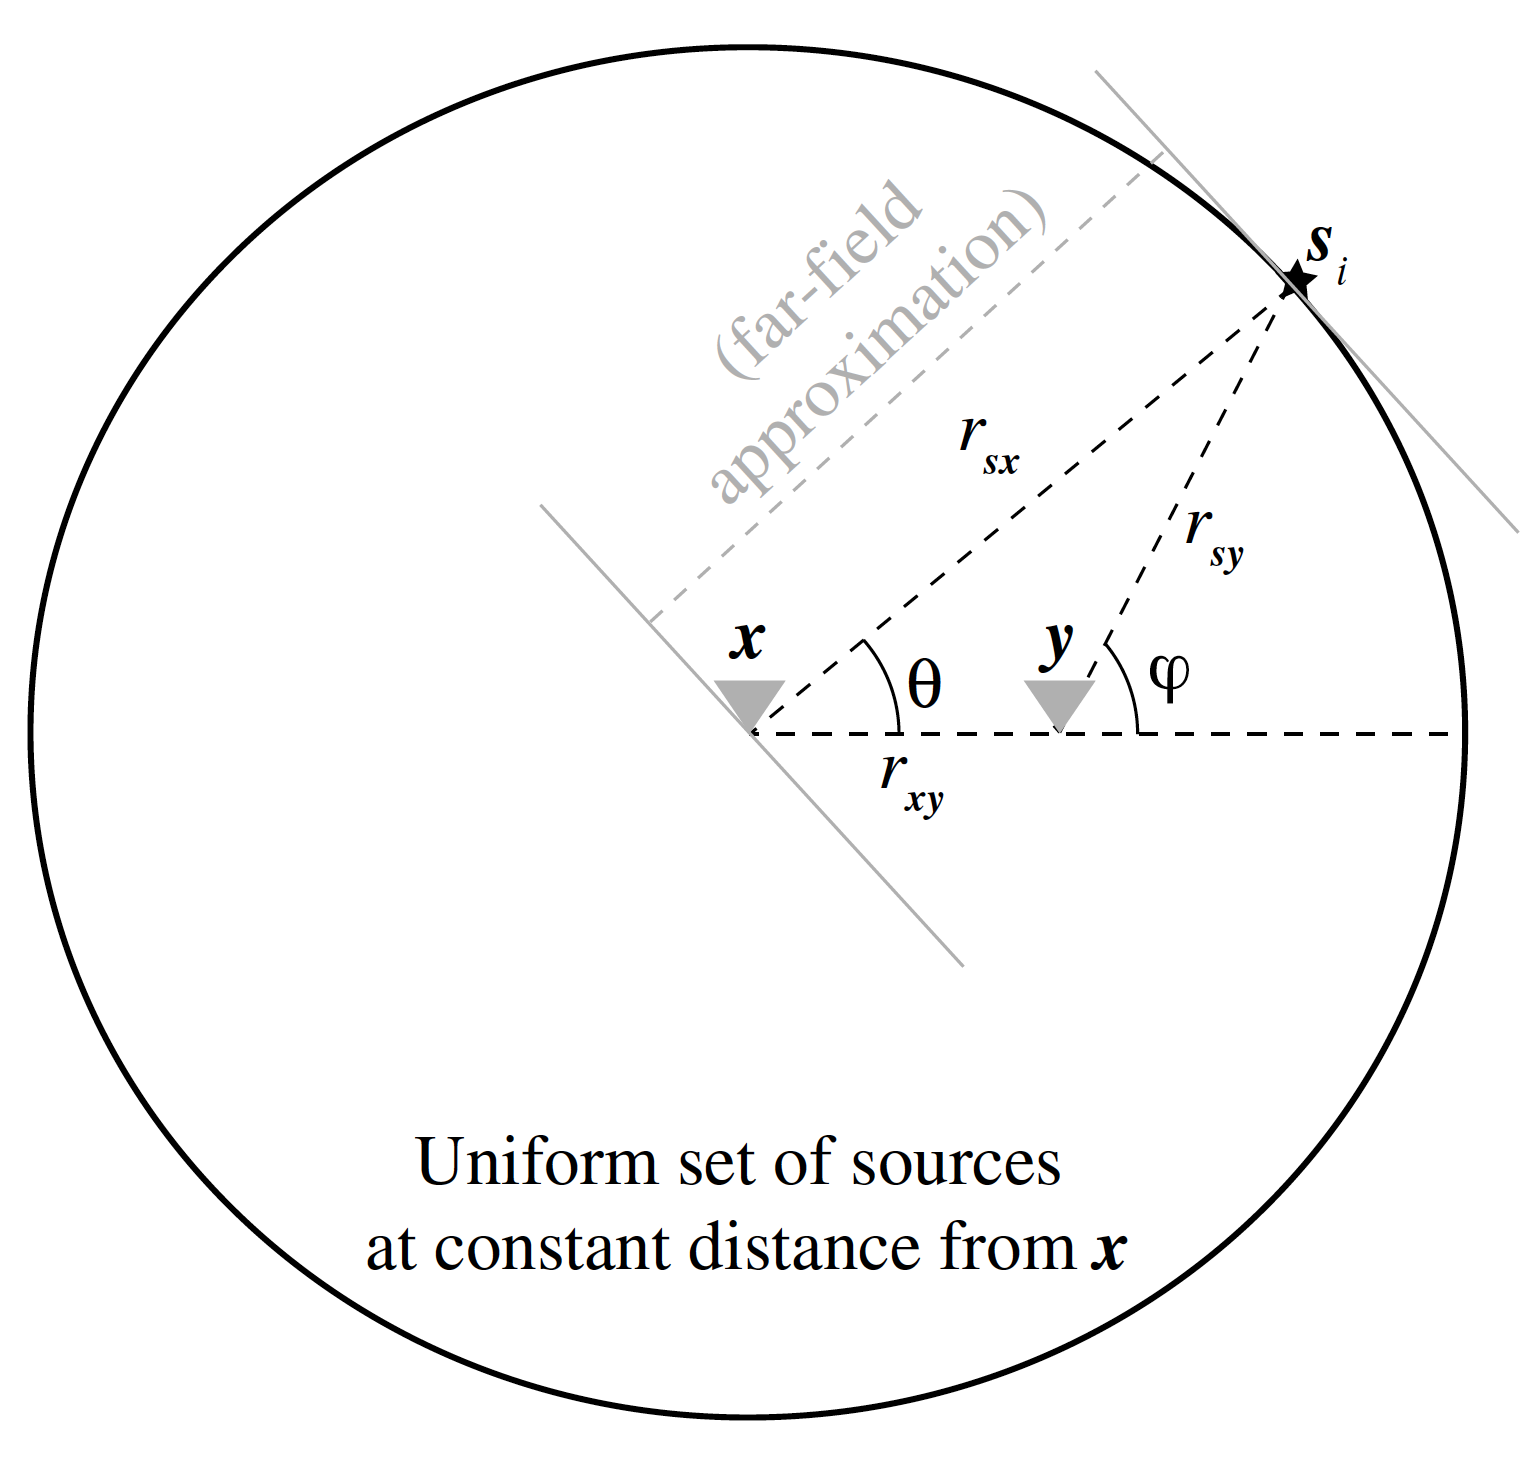

We will make a noise source as a time series that has a sampling rate of 10 Hz (0.1s), a simulation window of 100s, and a seismic wavespeed of **c=3km/s**. The distance between the two stations is 10 km. The seismogram will be represented as a Ricker wavelet of width 4s.

In [ ]:
fs = 10. # sampling rate
twin = 50. # window length
t = np.linspace(0,twin,int(twin*fs)) #points = 100


# a single Ricker wavelet
a = 4. # width of the Ricker wavelet in s
ta = np.linspace(0,a,int(a*fs)) 
s = signal.ricker(len(ta), a)
plt.plot(ta,s)
plt.xlabel('Time in s')


Now we will create a circle of noise sources around the pair of receivers.

The first station is at $x = (-2,0)$, the second station is at $y = (2,0)$, where the distances are in kilometers.


Let a noise source $s$ be at an angle $\theta$ of the circle centered at $x_0=(0,0)$. The distance bewteen the noise source $s$ and the receiver $x$ is $r$, thus the location of the noise source is $x_s = (r\cos\theta, r\sin\theta)$.

The phase lag between the noise source and the receiver is:

$dt_x = r_x /c$, 

where 

$r_x = \sqrt{ (r\cos\theta - x(1))^2  + (r\sin\theta - x(2))^2 } $ . 

and similarly for the phase lag between the noise source and the second reciver in $y$ 


$dt_y = \sqrt{ (r\cos\theta - y(1))^2  + (r\sin\theta - y(2))^2 } /c$ . 

We then shift the Ricker wavelet to "place" (in time) it at the correct arrival time and construct the seismograms of the first source n_1 at each receiver n_1_x and n_1_y.

In [ ]:
# initialize the seismograms with zeros
n_1_x = np.zeros(len(t))
n_1_y = np.zeros(len(t))

# seismic wavespeed
c = 3

# station location
x = [-5.,0.]
y = [5.,0.]
r = 20. # radius of the circle that has the noise sources


# assume a theta (in radian)
theta_1 = np.pi/3

In [ ]:
# calculate the distance and travel times
dt_1_x = np.sqrt( (r*np.cos(theta_1) - x[0])**2 + (r*np.sin(theta_1) - x[1])**2 )/c
dt_1_y = np.sqrt( (r*np.cos(theta_1) - y[0])**2 + (r*np.sin(theta_1) - y[1])**2 )/c
print("travel time between sources and receivers ",dt_1_x," s",dt_1_y," s")
# indexes where the arrival time will be centered
i_1_x = int(dt_1_x*fs) # shift also with the ricker wavelet width to avoid acausal signals (ricker wavelet is centered at a)
i_1_y = int(dt_1_y*fs)
print(i_1_x,i_1_y)

In [ ]:
# make shifted seismograms
n_1_x= np.zeros(len(t))
n_1_x[ i_1_x:i_1_x+len(s)]=s
n_1_y= np.zeros(len(t))
n_1_y[ i_1_y:i_1_y+len(s)]=s
plt.plot(t,n_1_x);plt.xlabel('time in s');plt.plot(t,n_1_y);plt.legend(['Noise in X', "Noise in Y"])

## Calculate the cross correlation between two seismograms

Use the numpy function ``np.correlate``. The additional argument to get the full correlation function is ``"full"``. The correlation returns a two sided function that has double the length of the original signal: t_corr = [-twin, twin]

In [ ]:
tcorr = np.linspace(-twin,twin,int(2*len(t)-1))

In [ ]:
C = np.correlate(n_1_x,n_1_y,'full')
plt.plot(tcorr,C);plt.grid(True);plt.xlim([-10,10])
print(len(C),len(t))

Now we will go around the circle and vary theta from 0 to 2$\pi$, plot each correlation to see how the phase lags change as a function of $\theta$

In [ ]:
N = 10000 # we will create N noise sources
# initialize the cross correlations
Corr = np.zeros(shape=(N,len(tcorr)))
for i in range(N):
  theta = 2*np.pi/N*i
  # calculate the distance between each noise source and the receivers
  dt_x = np.sqrt( (r*np.cos(theta) - x[0])**2 + (r*np.sin(theta) - x[1])**2 )/c
  dt_y = np.sqrt( (r*np.cos(theta) - y[0])**2 + (r*np.sin(theta) - y[1])**2 )/c
  i_x = int(dt_x*fs) # shift also with the ricker wavelet width to avoid acausal signals (ricker wavelet is centered at a)
  i_y = int(dt_y*fs)
  n_x= np.zeros(len(t))
  n_x[ i_x:i_x+len(s)]=s
  n_y= np.zeros(len(t))
  n_y[ i_y:i_y+len(s)]=s
  Corr[i,:] = np.correlate(n_x,n_y,'full')
  plt.plot(tcorr,Corr[i,:]+theta);plt.xlim([-10,10]);plt.grid(True)




When summing over noise sources, we obtain the final cross correlation

In [ ]:
plt.plot(tcorr,np.sum(Corr,axis=0));plt.grid(True);plt.xlim([-10,10])
plt.xlabel('Time in s')

Can you predict the arrival time for a wave traveleing from a virtual earthquake located at one station and received at the other?

In [ ]:
D = np.sqrt( (y[0]-x[0])**2 + (y[1]-x[1])**2 )
t = D/c
print(t) 